# M.Usman Akram
## Addition of Two Number Using ML with GUI
### Import Required Liberaries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
import joblib 
import warnings
warnings.filterwarnings("ignore")

### Import Dataset:

In [2]:
df=pd.read_csv("add.csv")

In [3]:
df.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


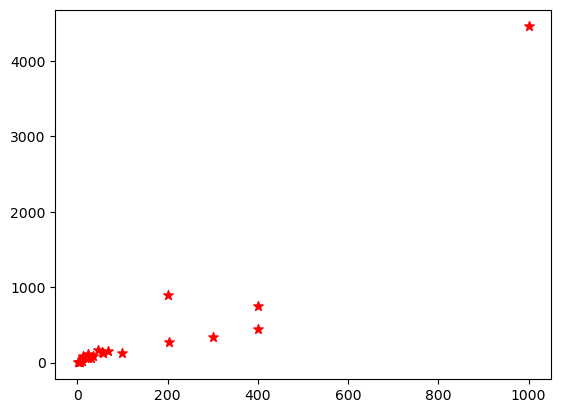

In [4]:
 plt.scatter(x=df["x"],y=df["sum"],s=50,
    c="red",
    marker="*",)

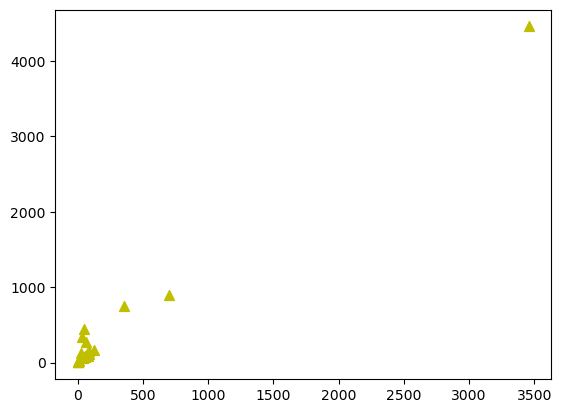

In [5]:
 plt.scatter(x=df["y"],y=df["sum"],s=50,
    c="y",
    marker="^",)

### Store the Feature Matrix in X and Response in Y

In [6]:
X=df[["x","y"]]
y=df["sum"]

### Train Test Split :

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33 ,random_state=42)

In [9]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


### import and Train the Model 

In [10]:
from sklearn.linear_model import LinearRegression 

In [11]:
model=LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
model.score(X_train,y_train)

1.0

In [14]:
model.score(X_test,y_test)

1.0

### Comparing The Results :

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ,  66. , 169.4, 334. ])

In [17]:
y_test

0       2.0
13    112.9
8      68.0
1       8.0
15    900.0
5      66.0
20    169.4
11    334.0
Name: sum, dtype: float64

In [18]:
df1=pd.DataFrame({"Original Data":y_test,"prediction":y_pred})

In [19]:
df1

,Original Data,prediction
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4
11,334.0,334.0


In [20]:
model.predict([[23,56]])

array([79.])

### Save Model Using Joblib :

In [21]:
import joblib as jl

In [22]:
jl.dump(model,"model_joblib")

['model_joblib']

In [23]:
model=jl.load("model_joblib")

In [24]:
model.predict([[23,67]])

array([90.])

### GUI :

In [25]:
import tkinter as tk
import joblib

# Load the ML model
model = joblib.load('model_joblib')

# Function to perform addition using the ML model
def add_numbers():
    num1 = float(entry_num1.get())
    num2 = float(entry_num2.get())
    result = model.predict([[num1, num2]])
    label_result['text'] = f"Result: {result[0]}"

# Create the GUI window
window = tk.Tk()
window.title("Addition GUI")

# Create input labels and entry fields
label_num1 = tk.Label(window, text="Number 1:",bg="black",fg="white")
label_num1.pack()
entry_num1 = tk.Entry(window)
entry_num1.pack()

label_num2 = tk.Label(window, text="Number 2:",bg="black",fg="white")
label_num2.pack()
entry_num2 = tk.Entry(window)
entry_num2.pack()

# Create the button to perform addition
button_add = tk.Button(window, text="Add", command=add_numbers,bg="red",fg="white")
button_add.pack()

# Create label to display the result
label_result = tk.Label(window, text="Result:",bg="blue",fg="white")
label_result.pack()

# Start the GUI event loop
window.mainloop()
